# Machine learning


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv(r"C:\Users\arai5\Desktop\Machine learning\Participants_Data_HPP\train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
new_df = df.head(50)

In [7]:
new_df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
5,Owner,0,0,3,BHK,1250.000000,1,1,"South Chittoor,Kochi",10.033280,76.282571,42.0
6,Dealer,0,0,3,BHK,1495.053957,1,1,"Sodala,Jaipur",26.916347,75.795600,66.5
7,Owner,0,1,3,BHK,1181.012946,1,1,"Kharar,Mohali",30.740000,76.650000,52.0
8,Dealer,0,1,2,BHK,1040.000000,1,1,"Bileshivale,Bangalore",13.054202,77.674002,41.6
9,Owner,0,1,2,BHK,879.120879,1,1,"Chromepet,Chennai",12.951610,80.140970,36.0


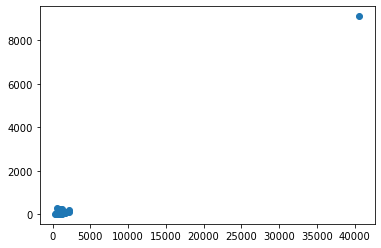

In [12]:
%matplotlib inline
plt.scatter(new_df.SQUARE_FT,new_df['TARGET(PRICE_IN_LACS)'])

In [21]:
new_df =df.rename(columns={'SQUARE_FT': 'Area'})

In [23]:
new_df =df.rename(columns={'TARGET(PRICE_IN_LACS)': 'Price'})

In [24]:
new_df

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,Area,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,Price
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5
...,...,...,...,...,...,...,...,...,...,...,...,...
29446,Owner,0,0,3,BHK,2500.000000,1,1,"Shamshabad Road,Agra",27.140626,78.043277,45.0
29447,Owner,0,0,2,BHK,769.230769,1,1,"E3-108, Lake View Recidency,,Vapi",39.945409,-86.150721,16.0
29448,Dealer,0,0,2,BHK,1022.641509,1,1,"Ajmer Road,Jaipur",26.928785,75.828002,27.1
29449,Owner,0,0,2,BHK,927.079009,1,1,"Sholinganallur,Chennai",12.900150,80.227910,67.0


In [66]:
new_df =new_df[['Area','Price']]

In [67]:
new_df =new_df.head(10)

In [68]:
new_df=new_df.astype({'Area':'int','Price':'int'})

In [69]:

new_df

,Area,Price
0,1300,55
1,1275,51
2,933,43
3,929,62
4,999,60
5,1250,42
6,1495,66
7,1181,52
8,1040,41
9,879,36


In [90]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = linear_model.LinearRegression()
x=new_df.Area
y=new_df.Price
print(x)
print(y)
x=np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
reg.fit(x,y)
print(x)



0    1300
1    1275
2     933
3     929
4     999
5    1250
6    1495
7    1181
8    1040
9     879
Name: Area, dtype: int32
0    55
1    51
2    43
3    62
4    60
5    42
6    66
7    52
8    41
9    36
Name: Price, dtype: int32
[[1300]
 [1275]
 [ 933]
 [ 929]
 [ 999]
 [1250]
 [1495]
 [1181]
 [1040]
 [ 879]]


In [97]:
#It is single value data that's why converting it to 2-D array we need of numpy 
#np.array([1]).reshape(1,-1)--->2-d array
#np.array([1,2]).reshape(-1,1)---->2-d array for multiple values.

ypre =reg.predict(np.array([1200]).reshape(1,-1))
print(ypre[0][0])

52.35955797118994


In [99]:
m=reg.coef_[0][0]
intrecept= reg.intercept_

In [ ]:
#y = mx+c

In [102]:
print(intrecept[0])

26.33077402921595


In [103]:
print((m*1200)+intrecept)

[52.35955797]


In [ ]:
#SO Our model is ready for predicting values.